In [21]:
# import pyximport; pyximport.install(language_level="3")
from collections import defaultdict
import heapq
from matplotlib import pyplot as plt
import csv
import pandas as pd
import networkx as nx
from collections import defaultdict
from settings import TOTAL_ROWS
import cProfile
# from utils import load_maps, load_df, display_dictionary,haversine, get_coord, get_distance
from search_service import DFS 
from utils import display_disneyland
from decimal import Decimal

from settings import RAIL_ROAD_ENTRANCE_ID

In [5]:
ATTRACTIONS_FNAME = "data/disneyland_attractions.csv"
ATTRACTIONS_EDGES_FNAME = "data/attractions_edges.csv"
    

In [10]:
all_edges = []


with open(ATTRACTIONS_EDGES_FNAME) as fin:
    
        
    csvr = csv.DictReader(fin)
    for line in csvr:
        all_edges.append(
            ( int(line["source"]), int(line["target"]))
        )
    
    
print(len(all_edges))

290


In [24]:
#min span tree
all_edges_distances = {}
heap_edges_cost = []
mygraph = defaultdict(dict)

with open(ATTRACTIONS_EDGES_FNAME) as fin:
    
        
    csvr = csv.DictReader(fin)
    for line in csvr:
        
        source, target = int(line['source']), int(line['target'])
        cost = Decimal(line["distance_km"]) 
        
        mygraph[source][target] = cost
        
        all_edges_distances[ (source, target)    ] = cost
        
        heap_edges_cost.append( (cost, source, target )    )

In [26]:
def create_spanning_tree( graph):
    starting_vertex = RAIL_ROAD_ENTRANCE_ID
    
    mst = defaultdict(set)
    visited = set([starting_vertex])
    edges = [
        (cost, starting_vertex, to)
        for to, cost in graph[starting_vertex].items()
    ]
    heapq.heapify(edges)

    while edges:
        cost, frm, to = heapq.heappop(edges)
        if to not in visited:
            visited.add(to)
            mst[frm].add(to)
            for to_next, cost in graph[to].items():
                if to_next not in visited:
                    heapq.heappush(edges, (cost, to, to_next))

    return mst

In [29]:
z = create_spanning_tree(mygraph )

min_span_tree = []

for source, mylist in z.items():
    
    for target in mylist:
        min_span_tree.append( (source, target) )

    

In [28]:
z

defaultdict(set,
            {91073: {50720},
             50720: {70282, 82766},
             70282: {40918},
             40918: {60282, 83634},
             60282: {61114},
             61114: {5359},
             5359: {29293},
             29293: {3125, 70412},
             70412: {6984},
             6984: {69026, 76976},
             69026: {61323},
             61323: {714, 43753},
             714: {33970},
             76976: {19797},
             19797: {72179},
             72179: {54449},
             54449: {11705, 76868},
             3125: {60568},
             60568: {73113},
             73113: {87125},
             87125: {32605},
             32605: {10515, 92795},
             10515: {74966},
             92795: {16200, 69032},
             16200: {2521},
             74966: {70528},
             69032: {41985},
             41985: {78442, 85718},
             78442: {96097},
             85718: {30923},
             30923: {46167},
             46167: {39868},
   

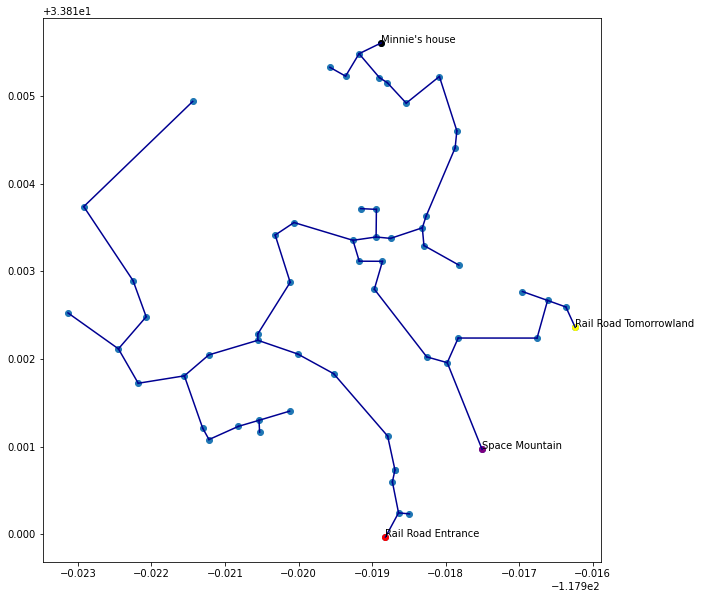

In [30]:

# attractions_map
# display_disneyland(all_edges)
display_disneyland(min_span_tree)

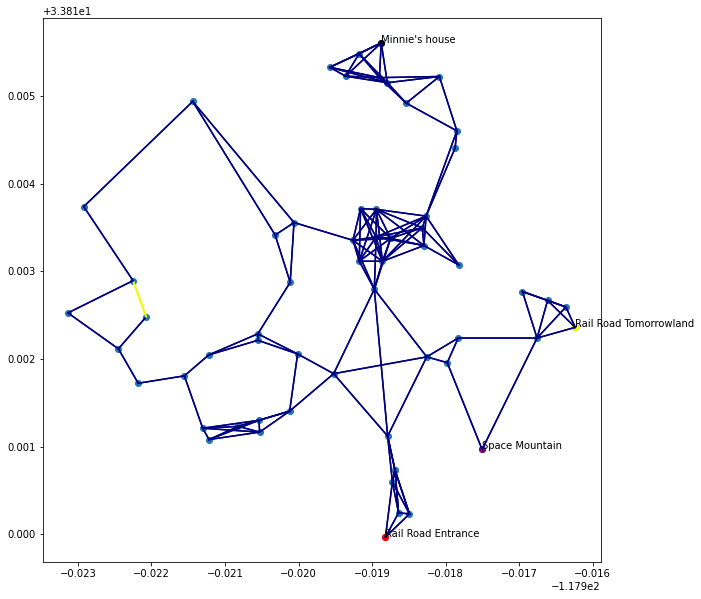

In [31]:
display_disneyland(all_edges)


In [ ]:



  

    
# def generate_edges(mymap, max_distance):
    
#     for key,value in mymap.items()



In [ ]:
get_distance(MINNIES_HOUSE_ID, RAIL_ROAD_ENTRANCE_ID, attractions_map)

In [ ]:
#80 is the best
edges = set()
max_distance = 80
for k1,v1 in attractions_map.items():
    for k2,v2 in attractions_map.items():
       
        if k1 == k2:
            continue
    
        source = min(k1, k2)
        target = max(k1,k2)
        d = get_distance(source, target , attractions_map)*1000
        if d <= max_distance:
            edges.add( (source, target))

    
    
       

In [ ]:
display_dictionary(attractions_map, edges)

In [ ]:
hard_coded_edges = set()

hard_coded_edges.add( (SPACE_MOUNTAIN_ID,SW_LAUNCH_BAY )   )
hard_coded_edges.add( (SPACE_MOUNTAIN_ID, SW_TOURS)   )


hard_coded_edges.add( (BUZZ_RIDE,SW_LAUNCH_BAY )   )

# WINNIE_POOH = "0A8B71CAD913A7BD8AA9"
# SW_ENTRANCE_ADV_LAND = "0B76231CE813D58AA419"
# SW_ENTRANCE_FANTASY_LAND = "045BFCC4E813D58E7955"
# SW_ENTRANCE_FRONTIER_LAND = "02E9209DE313D58F29B2"
#DAVY_CROC = "0CC239AEC813B172106A"


# STORY_BOOK_ "0F27749CE713A7C2EBF6"
# SMALL_WORLD = "0600C026F613A7C19D77"
hard_coded_edges.add( (STORY_BOOK,SMALL_WORLD )   )

hard_coded_edges.add( (STORY_BOOK,SMALL_WORLD_HOLIDAY )   )


hard_coded_edges.add( (RISE_RESISTANCE,SMUGGLERS_RUN )   )
hard_coded_edges.add( (RISE_RESISTANCE,SW_ENTRANCE_FRONTIER_LAND )   )


hard_coded_edges.add( (SW_ENTRANCE_FANTASY_LAND,SMUGGLERS_RUN )   )
hard_coded_edges.add( (SW_ENTRANCE_ADV_LAND,SMUGGLERS_RUN )   )


hard_coded_edges.add( (DAVY_CROC,SW_ENTRANCE_FRONTIER_LAND )   )
hard_coded_edges.add( (WINNIE_POOH,SW_ENTRANCE_FRONTIER_LAND )   )




hard_coded_edges.add( (FORTUNE_TELLER_MST_ID,TIKI_ROOM_ID )   )
hard_coded_edges.add( (FORTUNE_TELLER_MST_ID, CASTLE_ID)   )
hard_coded_edges.add( (FORTUNE_TELLER_MST_ID, ASTRO_ORBITOR_ID)   )

hard_coded_edges.add( (TIKI_ROOM_ID, CASTLE_ID)   )
hard_coded_edges.add( (TIKI_ROOM_ID, ASTRO_ORBITOR_ID)   )

hard_coded_edges.add( (CASTLE_ID, ASTRO_ORBITOR_ID)   )


print(len(edges))
edges = edges.union( hard_coded_edges )
print(len(edges))

display_dictionary(attractions_map, edges)

In [ ]:
edges_dict = defaultdict(list)

for e in edges:
    
    edges_dict[e[0]].append(e[1])
    edges_dict[e[1]].append(e[0])

for k in edges_dict.keys():
    edges_dict[k] = tuple(edges_dict[k])
    


In [ ]:
DFS.mydict = attractions_map
DFS.edges_dict = edges_dict
DFS.start( )

In [ ]:
# DFS.hops = 0
# DFS.hops

# DFS.mypath

preview_edges = []

for i in range(1, len(DFS.mypath)):
    preview_edges.append(
        (DFS.mypath[i-1],DFS.mypath[i])
    )
    
display_dictionary(attractions_map, preview_edges)    

In [ ]:
# DFS(edges_dict, [], RAIL_ROAD_ENTRANCE_ID)

cProfile.run('DFS.start()')

In [ ]:
RAIL_ROAD_ENTRANCE_ID

In [ ]:
%load_ext line_profiler

In [ ]:
DFS.reset_me()
print(DFS.hops)
#DFS.stop_search

In [ ]:
%lprun -f DFS.jump DFS.start( )

In [ ]:
edges_dict[RAIL_ROAD_ENTRANCE_ID]